# Tutorial 4_Extension

By doing this extension, I want to achieve three things:

1) expand on my ability to code by automating some of the processes used in the Linear Discriminant Functions tutorial

2) Understand the concepts a bit better

# Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Linear Discriminant Functions

In [20]:
def LDF(X, w, w_0):
    """
    Computes the discriminant function g(X) = w . X + w_0
    """
    return np.matmul(w, X) + w_0


def create_grid(*x):
    """
    Creates a grid of points to plot based on n x coordinates
    """
    p = 1
    for i in x:
        p *= len(i)
    grid = [*np.meshgrid(*x)]
    Xgrid = np.array(grid).reshape(len(grid),p)
    return Xgrid

def reshape_by_component(f, *x):
    """
    reshapes a function f by the dimensions of it's consituent components *x
    """
    return f.reshape(*[len(i) for i in x])
    

200 200


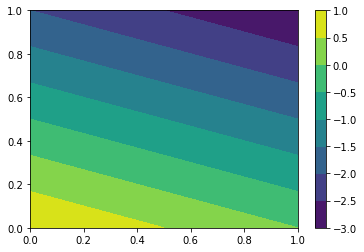

In [25]:
# text function

x1 = np.linspace(0,1,200)
x2 = np.linspace(0,1,200)

Xgrid = create_grid(x1,x2)

w = [-1,-3]

g = LDF(Xgrid, w, 1)

g = reshape_by_component(g, x1,x2)

plt.contourf(x1, x2, g)
plt.colorbar()

# this result is equivalent to that of exercise two from the tutorial
# looks like the functions are working well!

In [78]:
def generalised_LDF(X, W, w_0):
    """
    given coodinates X, a weight matrix W and a bias value of w_0, computes the relevant
    classes for each input
    """
    gs = []
    for w in W:
        gs.append(LDF(X, w, w_0))
    # define classes array
    Y = np.zeros([1, X.shape[1]])
    for i in range(len(gs)):
        Y_temp = np.ones([1, X.shape[1]])
        for j in range(len(gs)):
            Y_temp[0, gs[i] < gs[j]] = 0
            
        Y[Y_temp == 1] = i + 1
    
    return Y

(2, 40000)
(1, 40000)
200 200


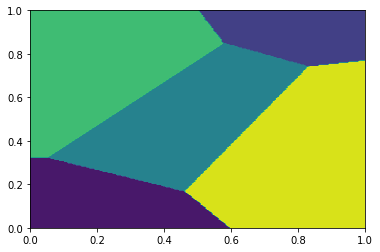

In [81]:
W = np.array([
    [1.3, -1, -3],
    [-2, 1, 2],
    [0.3, 0.1, -0.1],
    [0, -1, 1],
    [-0.2, 1.5, -1],
])

# NOTE: Xgrid needs to change!

Xgrid = create_grid(x1,x2)
print(Xgrid.shape)
print(np.ones([1,Xgrid.shape[1]]).shape)
Ygrid = np.concatenate([np.ones([1,Xgrid.shape[1]]), Xgrid])

Y = generalised_LDF(Ygrid, W, 1)

Y = reshape_by_component(Y,x1,x2)

plt.contourf(x1,x2,Y)

# Higher order functions

In [195]:
W = np.array([
    [1.3, -1, -3, -10],
    [-1, 1.5, 3, -1],
    [0.3, 0.1, -0.1],
    [0, -1, 1],
    [-0.2, 1.5, -1],
])

,Distance (mm),Total absorption,Dist_squared
0,3.342876,175.719675,11.174821
1,1.203074,57.261716,1.447386
2,3.976552,179.448952,15.812962
3,3.335264,176.218606,11.123983
4,3.400901,167.033748,11.566126


[[  9979.55332572  35827.1979127  136929.351774  ]
 [  3000.8863473    9979.55332572  35827.1979127 ]
 [  1000.           3000.8863473    9979.55332572]] [[1683776.78670197]
 [ 482776.42824979]
 [ 149967.06847032]]
[[ 3.32219469]
 [67.59434588]
 [-5.63132177]]
0 [3.32219469]
1 [67.59434588]
2 [-5.63132177]


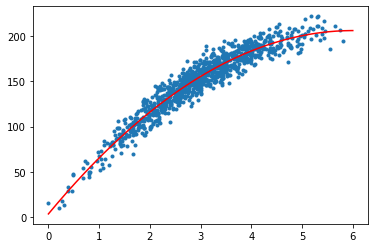

In [196]:
X = df[['Distance (mm)','Dist_squared']]

model = Regression(X, y)
model.LinearRegression()
model.plot(color = 'red')

# References

Note: citations do not follow any well-established format.

[1] ME4 Machine Learning, Peter Huthwaite, Imperial College London